<a href="https://colab.research.google.com/github/Ugo-1/Hamoye-Internship/blob/main/Hamoye_Stage_B_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz

Importing Libraries and Data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [48]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Linear Model Between Temperature in the Living Room (x=T2) and Outside the Building(y = T6)

Importing Libraries and Preparing Model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

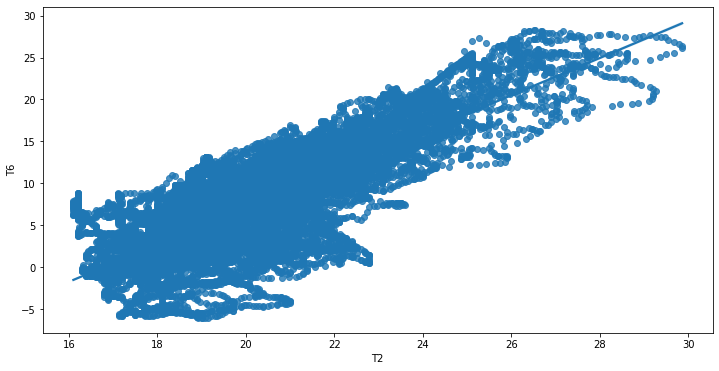

In [50]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['T2'], y=df['T6'])

In [51]:
df[['T2', 'T6']].corr()

,T2,T6
T2,1.000000,0.801186
T6,0.801186,1.000000


In [52]:
X_train, X_test, y_train, y_test = train_test_split(df[['T2']], df[['T6']], test_size=0.3, random_state=4)

Model Development

In [53]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [54]:
lin_pred = lin_model.predict(X_test)

Model Evaluation

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
print(f'R2 Score: {round(r2_score(y_test, lin_pred), 2)}')

R2 Score: 0.65


## Min Max Scaler Normalising

Preprocessing and Processing of Data

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()
model_df = df.drop(columns = ['date', 'lights'])

In [62]:
normalised_df = pd.DataFrame(scaler.fit_transform(model_df), columns = model_df.columns)

In [63]:
features_df = normalised_df.drop(columns = ['Appliances'])
target = normalised_df[['Appliances']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

Model Development

In [65]:
mul_lin_model = LinearRegression()

In [66]:
mul_lin_model.fit(X_train, y_train)

LinearRegression()

In [67]:
mul_predict = mul_lin_model.predict(X_test)

Model Evaluation

In [68]:
print(f'Mean Absolute Error: {round(mean_absolute_error(y_test, mul_predict), 2)}')

Mean Absolute Error : 0.05


In [78]:
print(f'Residual Sum of Squares: {round(np.sum(np.square(y_test - mul_predict)), 2)}')

Residual Sum of Squares: Appliances    45.35
dtype: float64


In [97]:
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, mul_predict)), 3)}')

Root Mean Squared Error: 0.088


In [80]:
print(f'R2 Score or Coefficient of Determination: {round(r2_score(y_test, mul_predict), 2)}')

R2 Score or Coefficient of Determination: 0.15


Feature Weights of Multiple Linear Regression

In [93]:
pd.Series(mul_lin_model.coef_.reshape(26), features_df.columns).sort_values()

RH_2          -0.456698
T_out         -0.321860
T2            -0.236178
T9            -0.189941
RH_8          -0.157595
RH_out        -0.077671
RH_7          -0.044614
RH_9          -0.039800
T5            -0.015657
T1            -0.003281
rv1            0.000770
rv2            0.000770
Press_mm_hg    0.006839
T7             0.010319
Visibility     0.012307
RH_5           0.016006
RH_4           0.026386
T4             0.028981
Windspeed      0.029183
RH_6           0.038049
RH_3           0.096048
T8             0.101995
Tdewpoint      0.117758
T6             0.236425
T3             0.290627
RH_1           0.553547
dtype: float64

## Lasso, Ridge Regression

In [94]:
from sklearn.linear_model import Ridge, Lasso

Ridge Regression

In [95]:
ridge = Ridge(alpha = 0.4)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4)

In [96]:
ridge_predict = ridge.predict(X_test)

In [98]:
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, ridge_predict)), 3)}')

Root Mean Squared Error: 0.088


Lasso Regression

In [99]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [102]:
lasso.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [110]:
Non_zero_count = 0

for i in lasso.coef_:
  if i != 0:
    Non_zero_count += 1

print(Non_zero_count)

4


In [112]:
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))), 3)}')

Root Mean Squared Error: 0.094
